<a href="https://colab.research.google.com/github/thyeaditungson29/myDataScience/blob/main/UAS_EVDA_Thyeadi_Tungson_2106779554.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisa Postingan Twitter Menggunakan NLP**

Tugas UAS Mata Kuliah Eksplorasi dan Visualisasi Data Analisis (EVDA)
*   Nama: Thyeadi Tungson
*   NPM:  2106779554



Ini adalah Proyek Analisis Sentimen menggunakan Teknik Natural Language Processing (NLP) dengan objek pengamatan adalah salah satu topik yang lagi tending di twitter yaitu: NBA Final.

# **Latar Belakang**

Final NBA adalah seri kejuaraan bola basket National Basketball Association di Amerika Utara yang dimainkan antara pemenang Eastern Conference dan Western Conference, yang terdiri oleh 32 tim yang berada di Amerika Serikat dan satu di Kanada (Toronto) dengan para pemain banyak bola basket dari Amerika Serikat.

Namun demikian bukan hanya warga Amerika Serikat saja yang menggemari pertandingan Final NBA ini, namun juga para penggemar dan juga pemain basket di seluruh dunia.
Tentu saja menjelang dan saat Final NBA banyak sekali cuitan ataupun postingan terkait even ini terutama di media sosial seperti twitter. 

Oleh karena itu, penulis ingin sekali melakukan observasi dengan melakukan analisis sentimen terhadap cuitan ataupun postingan terkait FInal NBA ini dengan menggunakan Teknik Natural Language Processing (NLP).

# **Rumusan Masalah**

Dalam Menganalisa sentimen dari postingan twitter terkait NBA Final maka penulis merumuskan permasalahan sebagai berikut:
1. Postingan dari negara mana sajakah yang banyak muncul terkait NBA FInal?
2. Apa sajakah 10 kata yang banyak muncul terkait NBA FInal?
3. Bagaimanakan sentimen analisis yang muncul terkait NBA FInal?

# **Tahapan-tahapan dalam Explanatory Data Analysis**

## **1. Install modul dan import library yang akan digunakan**

In [69]:
!pip install -q chart_studio
!pip install -q emot

In [70]:
!pip install -q nltk

In [71]:
import tweepy # untuk mining data twitter
import pandas as pd # Untuk data manipulasi dan analisis
import numpy as np # Untuk melakukan operasi array dan operasi matematika
import csv # Untuk membaca dan menyimpan file csv
import re # Pustaka ekspresi reguler bawaan
import string # Pustaka string bawaan
import glob # untuk mengambil file/nama path yang cocok dengan pola yang ditentukan. 
import random # Untuk membuat bilangan random
import requests # untuk meminta HTTP
from PIL import Image # untuk membuka, memanipulasi, dan menyimpan banyak file gambar yang berbeda
import matplotlib.pyplot as plt # Untuk Plot grafik

# Tetapkan batas tampilan Pandas Dataframe untuk menghindari potensi pembekuan sistem (system freeze)
pd.set_option("display.max_rows", 15)
pd.set_option("display.max_columns", 15)
pd.set_option('display.max_colwidth', 40)

# Toolkit untuk Natural Language Processing (NLP))
from nltk.corpus import stopwords, words # dapatkan stopwords dari perpustakaan NLTK & dapatkan semua kata dalam bahasa Inggris
from nltk.tokenize import word_tokenize # untuk membuat token kata
from nltk.stem import WordNetLemmatizer # untuk mengurangi kata-kata ke bentuk aslinya
from nltk import pos_tag # untuk memuat partisi Speech tagging

from textblob import TextBlob # TextBlob - Library Python untuk memproses data teks

import plotly.express as px # Untuk membuat express plots pada Plotly
import chart_studio.tools as cst # Untuk eksport ke Chart studio
import chart_studio.plotly as py # Untuk eksport tampilan Plotly ke Chart Studio
# import plotly.offline as pyo # Setel mode notebook untuk bekerja secara offline
# pyo.init_notebook_mode()
import plotly.io as pio # render data Plotly
# pio.renderers
import plotly.graph_objects as go # Untuk memplot grafik objek plotly
from plotly.subplots import make_subplots #untuk membuat lebih dari satu plot di Plotly


# Word Cloud - Pustaka Python untuk membuat awan kata gambar
from wordcloud import WordCloud

from emot.emo_unicode import UNICODE_EMOJI # import emojis
from emot.emo_unicode import EMOTICONS_EMO # import EMOTICONS

# **2. Menyambung Koneksi dengan Twitter dan melakukan Mining Data**

Penulis menggunakan library Tweepy untuk Python untuk screep tweet. Berikut adalah keys untuk menghubungkan dengan Twitter

In [4]:
#Silahkan memasukkan kode API twitter yang sudah didapatkan
consumer_key = '*****************************************'
consumer_secret = '*****************************************'
access_key = '*****************************************'
access_secret = '*****************************************' 

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) # Memberikan Consumer key dan secret untuk otentikasi oleh Twitter API
auth.set_access_token(access_key, access_secret) # Memberikan Access key dan secret untuk otentikasi oleh Twitter API
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True) # Lakukan Sleeps jika limit API terpenuhi

**Fungsi untuk kueri penelusuran Twitter**

Terdapat 4 fungsi berbeda untuk kueri penelusuran kata/frasa berbeda yang miliki dan menyimpannya dalam file csv. Untuk putaran pertama, Penulis tidak harus menentukan "since_id" tetapi Penulis harus melakukannya pada kali berikutnya agar API Twitter tidak mengembalikan Tweet yang sudah Penulis miliki. Hal lain yang perlu diperhatikan adalah Anda tidak perlu menentukan waktu tidur untuk fungsi yang ada.
Empat frasa yang ingin dijadikan kunci untuk grab/mengambil data twitter adalah:

1. NBA FInals
2. NBA Final
3. NBAFinal
4. NBA Winner

sebelumnya mengupload terlebih dahulu ke folder /content dari google colab yaitu file kosong dengan nama data1.csv, data2.csv, data3.csv, dan data4.csv di mana pada baris pertama diisikan data berikut:

> *tweet_id,created_at,text,location,retweet,favorite*


Berikut adalah langkah-langkahnya:

In [6]:
def get_tweets2(search_query2, num_tweets2, since_id_num2):
    # Kumpulkan tweet menggunakan objek Kursor
    # Setiap item dalam iterator memiliki berbagai atribut yang dapat Anda akses untuk mendapatkan informasi tentang setiap tweet
    tweet_list2 = [tweets for tweets in tweepy.Cursor(api.search,
                                    q=search_query2,
                                    lang="en",
                                    since_id=since_id_num2,
                                    tweet_mode='extended').items(num_tweets2)]
    # Mulailah mengambil tweet satu per satu:
    for tweet in tweet_list2[::-1]:
        tweet_id = tweet.id # dapatkan tweet_id
        created_at = tweet.created_at # dapatkan waktu tweet dibuat
        text = tweet.full_text # ambil semua kalimat tweet
        location = tweet.user.location # ambil lokasi pengirim
        retweet = tweet.retweet_count # ambil banyak retweet
        favorite = tweet.favorite_count # ambil banyak likes
        with open('/content/data1.csv','a', newline='', encoding='utf-8') as csvFile2:
            csv_writer2 = csv.writer(csvFile2, delimiter=',') # membuatnya ojek file csv
            csv_writer2.writerow([tweet_id, created_at, text, location, retweet, favorite]) # menulis setiap barisnya

In [7]:
search_words2 = "\"NBA Finals \"" # Menentukan frasa yang tepat untuk dicari
# Buang Links, retweets, replies
search_query2 = search_words2 + " -filter:links AND -filter:retweets AND -filter:replies"
with open('/content/data1.csv', encoding='utf-8') as data:
    latest_tweet = list(csv.reader(data))[-1][0] 
get_tweets2(search_query2, 10000, latest_tweet)

Rate limit reached. Sleeping for: 861
Rate limit reached. Sleeping for: 862
Rate limit reached. Sleeping for: 864


In [8]:
# Same as above
def get_tweets3(search_query3, num_tweets3, since_id_num3):
    # Kumpulkan tweet menggunakan objek Kursor
    # Setiap item dalam iterator memiliki berbagai atribut yang dapat Anda akses untuk mendapatkan informasi tentang setiap tweet
    tweet_list3 = [tweets for tweets in tweepy.Cursor(api.search,
                                    q=search_query3,
                                    since_id=since_id_num3,
                                    lang="en",
                                    tweet_mode='extended').items(num_tweets3)]

    # Mulailah mengambil tweet satu per satu:
    for tweet in tweet_list3[::-1]:
        tweet_id = tweet.id
        created_at = tweet.created_at
        text = tweet.full_text
        location = tweet.user.location
        retweet = tweet.retweet_count
        favorite = tweet.favorite_count
        with open('/content/data2.csv', 'a', newline='', encoding='utf-8') as csvFile3:
            csv_writer3 = csv.writer(csvFile3, delimiter=',')
            csv_writer3.writerow([tweet_id, created_at, text, location, retweet, favorite])

In [9]:
search_words3 = "\"NBA Final\"" # Menentukan frasa yang tepat untuk dicari
# Buang Links, retweets, replies
search_query3 = search_words3 + " -filter:links AND -filter:retweets AND -filter:replies"
with open('/content/data2.csv', encoding='utf-8') as data:
    latest_tweet = list(csv.reader(data))[-1][0] 
get_tweets3(search_query3, 10000, latest_tweet)

In [10]:
# Same as above
def get_tweets4(search_query4, num_tweets4, since_id_num4):
    # Kumpulkan tweet menggunakan objek Kursor
    # Setiap item dalam iterator memiliki berbagai atribut yang dapat Anda akses untuk mendapatkan informasi tentang setiap tweet
    tweet_list4 = [tweets for tweets in tweepy.Cursor(api.search,
                                    q=search_query4,
                                    lang="en",
                                    since_id=since_id_num4,
                                    tweet_mode='extended').items(num_tweets4)]

    # Mulailah mengambil tweet satu per satu:
    for tweet in tweet_list4[::-1]:
        tweet_id = tweet.id
        created_at = tweet.created_at
        text = tweet.full_text
        location = tweet.user.location
        retweet = tweet.retweet_count
        favorite = tweet.favorite_count
        with open('/content/data3.csv','a', newline='', encoding='utf-8') as csvFile4:
            csv_writer4 = csv.writer(csvFile4, delimiter=',')
            csv_writer4.writerow([tweet_id, created_at, text, location, retweet, favorite])

In [11]:
search_words4 = "\"NBAFinal \"" # Menentukan frasa yang tepat untuk dicari
# Buang Links, retweets, replies
search_query4 = search_words4 + " -filter:links AND -filter:retweets AND -filter:replies"
with open('/content/data3.csv',encoding='utf-8') as data:
    latest_tweet=list(csv.reader(data))[-1][0] 
get_tweets4(search_query4,10000,latest_tweet)

In [12]:
def get_tweets5(search_query5, num_tweets5, since_id_num5):
    # Kumpulkan tweet menggunakan objek Kursor
    # Setiap item dalam iterator memiliki berbagai atribut yang dapat Anda akses untuk mendapatkan informasi tentang setiap tweet
    tweet_list5 = [tweets for tweets in tweepy.Cursor(api.search,
                                    q=search_query5,
                                    lang="en",
                                    since_id=since_id_num5,
                                    tweet_mode='extended').items(num_tweets5)]

    # Mulailah mengambil tweet satu per satu:
    for tweet in tweet_list5[::-1]:
        tweet_id = tweet.id
        created_at = tweet.created_at
        text = tweet.full_text
        location = tweet.user.location
        retweet = tweet.retweet_count
        favorite = tweet.favorite_count
        with open('/content/data4.csv','a',newline='', encoding='utf-8') as csvFile5:
            csv_writer5 = csv.writer(csvFile5, delimiter=',')
            csv_writer5.writerow([tweet_id, created_at, text, location, retweet, favorite])

In [13]:
search_words5 = "\"NBA Winner \"" # Menentukan frasa yang tepat untuk dicari
# Buang Links, retweets, replies
search_query5 = search_words5 + " -filter:links AND -filter:retweets AND -filter:replies"
with open('/content/data4.csv', encoding='utf-8') as data:
    latest_tweet = list(csv.reader(data))[-1][0]
get_tweets5(search_query5, 10000, latest_tweet)

**Menggabungkan semua tweet yang terdapat dalam 4 file CSV menjai 1 Panda Dataframe**

In [72]:
path = '/content'  # Path dari file csv yang sudah ada isi tweet yang dicari
all_files = glob.glob(path + "/*.csv")

tweets = []

df1 = pd.read_csv('/content/data1.csv', index_col=None, header=0) # konfersikan tiap file csv ke dataframe
tweets.append(df1)
df2 = pd.read_csv('/content/data2.csv', index_col=None, header=0) # konfersikan tiap file csv ke dataframe
tweets.append(df2)
df3 = pd.read_csv('/content/data3.csv', index_col=None, header=0) # konfersikan tiap file csv ke dataframe
tweets.append(df3)
df4 = pd.read_csv('/content/data4.csv', index_col=None, header=0) # konfersikan tiap file csv ke dataframe
tweets.append(df4)

tweets_df = pd.concat(tweets, axis=0, ignore_index=True) # Gabungkan semua dataframes

tweets_df.head()

,tweet_id,created_at,text,location,retweet,favorite
0,1533618108216365056,2022-06-06 01:13:44,Draymond having a emotional meltdown...,New jersey,1,1
1,1533618143767175168,2022-06-06 01:13:53,"The NBA finals are so boring, I can'...",rock city,0,0
2,1533618149341507584,2022-06-06 01:13:54,My son has me watching the #NBA fina...,140 Adams Ave B12 Hauppauge NY,0,3
3,1533618150381654018,2022-06-06 01:13:54,You can’t eject someone from an NBA ...,"Dedham, MA",0,0
4,1533618153925779457,2022-06-06 01:13:55,Draymond Green doing dumb ass shit i...,NaN,0,2


# **3. Data Cleaning**
Data frame gabungan pada proses sebelumnya akandibersihkan di bagian ini. tweet yang duplikat diperiksa dan dihapus. Penting juga untuk menyebutkan bahwa ID Tweet dianggap sebagai kunci utama untuk semua kerangka data. 

In [73]:
tweets_df.shape #Mengetahui jumlah baris dan kolom

(10589, 6)

In [74]:
tweets_df.duplicated(subset='tweet_id').sum() # Cek duplikat

7

In [75]:
tweets_df=tweets_df.drop_duplicates(subset=['tweet_id']) # Membuang duplikat

In [77]:
tweets_df.shape # Cek dimensi dataframe setelah membuang duplikat

(10582, 6)

In [78]:
tweets_df.isna().any() # Cek nilai "NaN"/missing value

tweet_id      False
created_at    False
text          False
location       True
retweet       False
favorite      False
dtype: bool

In [79]:
tweets_df['location']=tweets_df['location'].fillna('No location') # Mengganti nilai "NaN" dengan kata "No Location"

In [80]:
tweets_df.isna().any() # Cek ulang nilai "NaN"/missing value

tweet_id      False
created_at    False
text          False
location      False
retweet       False
favorite      False
dtype: bool

# **4. Location Geocoding**

Untuk menjawab rumusan masalah no. 1 maka penulis ingin menambahkan peta yang menunjukkan jumlah tweet per negara. Untuk melakukan itu, Tableau membutuhkan informasi geografis dasar yang dapat dikenalinya. Setelah beberapa percobaan dan kesalahan, penulis akhirnya menggunakan HERE Developer API untuk mengembalikan nama Bujur, Lintang & Negara untuk setiap tweet. 

> untuk mendapatkan no API silahkan daftar ke:
https://developer.here.com/


Satu hal penting adalah jika Anda mengirim permintaan dengan nilai "NaN" atau Null ke API, itu akan mengembalikan lokasi sebenarnya. Inilah mengapa penulis harus mengganti nilai "NaN" dengan "No Location" pada langkah Pembersihan Data. Penting juga untuk mempelajari kerangka data untuk memastikan dalam mendapatkan hasil yang diharapkan.

**Menyambungkan ke API dan Fungsi mendapatkan Koordinat dari asal tweet**

In [81]:
URL = "https://geocode.search.hereapi.com/v1/geocode"  # Link developer Here API
api_key = '*****************************************'  # Dapatkan kunci API dari developer.here.com

def getCoordinates(location):
    PARAMS = {'apikey': api_key, 'q': location} # memerlukan parameter
    r = requests.get(url=URL, params=PARAMS)  # melewatkan parameter yang diperlukan
    data = r.json() # FIle Raw dalam bentuk json 
    return data

In [84]:
tweets_df['Location_data']=tweets_df['location'].apply(getCoordinates) # Terapkan fungsi coordinat

**Fungsi mendapatkan Lokasi**

In [82]:
# fungsi untuk mengekstrak informasi koordinat yang diperlukan ke dataframe tweets_df

def getLocation(location):
    for data in location:
        if len(location['items'])>0:
            latitude = location['items'][0]['position']['lat']
            longitude = location['items'][0]['position']['lng']
            try:   
                country_code = location['items'][0]['address']['countryCode']
                country_name = location['items'][0]['address']['countryName']
                country_name = location['items'][0]['address']['countryName']
            except KeyError:
                country_code = float('Nan')
                country_name = float('Nan')
        else: 
            latitude = float('Nan')
            longitude = float('Nan')
            country_code = float('Nan') 
            country_name = float('Nan')
        result = (latitude, longitude, country_code, country_name)
    return result

In [85]:
tweets_df['location']=tweets_df['Location_data'].apply(getLocation) #Terapkan fungsi getLocation

In [86]:
tweets_df.head() # Cek 5 data pertama dari dataframe

,tweet_id,created_at,text,location,retweet,favorite,Location_data
0,1533618108216365056,2022-06-06 01:13:44,Draymond having a emotional meltdown...,"(40.21789, -74.75941, USA, United St...",1,1,"{'items': [{'title': 'NJ, United Sta..."
1,1533618143767175168,2022-06-06 01:13:53,"The NBA finals are so boring, I can'...","(42.6281, -89.09022, USA, United Sta...",0,0,"{'items': [{'title': 'Rock, Town of,..."
2,1533618149341507584,2022-06-06 01:13:54,My son has me watching the #NBA fina...,"(40.81483, -73.25684, USA, United St...",0,3,"{'items': [{'title': '140 Adams Ave,..."
3,1533618150381654018,2022-06-06 01:13:54,You can’t eject someone from an NBA ...,"(42.2481, -71.1732, USA, United States)",0,0,"{'items': [{'title': 'Dedham, MA, Un..."
4,1533618153925779457,2022-06-06 01:13:55,Draymond Green doing dumb ass shit i...,"(nan, nan, nan, nan)",0,2,{'items': []}


In [87]:
# Ekstraksi Koordinat Lokasi dan nama Negara ke kolom yang berbeda
tweets_df[['Latitude', 'Longitude', 'Country_Code',
           'Country_Name']] = pd.DataFrame(tweets_df['location'].tolist(),
                                           index=tweets_df.index)

In [88]:
tweets_df.head() # Cek 5 data pertama dari dataframe

,tweet_id,created_at,text,location,retweet,favorite,Location_data,Latitude,Longitude,Country_Code,Country_Name
0,1533618108216365056,2022-06-06 01:13:44,Draymond having a emotional meltdown...,"(40.21789, -74.75941, USA, United St...",1,1,"{'items': [{'title': 'NJ, United Sta...",40.21789,-74.75941,USA,United States
1,1533618143767175168,2022-06-06 01:13:53,"The NBA finals are so boring, I can'...","(42.6281, -89.09022, USA, United Sta...",0,0,"{'items': [{'title': 'Rock, Town of,...",42.62810,-89.09022,USA,United States
2,1533618149341507584,2022-06-06 01:13:54,My son has me watching the #NBA fina...,"(40.81483, -73.25684, USA, United St...",0,3,"{'items': [{'title': '140 Adams Ave,...",40.81483,-73.25684,USA,United States
3,1533618150381654018,2022-06-06 01:13:54,You can’t eject someone from an NBA ...,"(42.2481, -71.1732, USA, United States)",0,0,"{'items': [{'title': 'Dedham, MA, Un...",42.24810,-71.17320,USA,United States
4,1533618153925779457,2022-06-06 01:13:55,Draymond Green doing dumb ass shit i...,"(nan, nan, nan, nan)",0,2,{'items': []},NaN,NaN,NaN,NaN


In [89]:
# Buang kolom yang tidak dibutuhkan
tweets_df.drop(['Location_data','location','location'], axis=1, inplace=True)
# Menamakan ulang kolom
tweets_df.columns=['Tweet_ID','Time_Created','Tweet','Retweet_Count','Favorite_Count',
                   'Latitude','Longitude','Country_Code','Country_Name']

In [90]:
tweets_df.head() # Cek 5 data pertama dari dataframe

,Tweet_ID,Time_Created,Tweet,Retweet_Count,Favorite_Count,Latitude,Longitude,Country_Code,Country_Name
0,1533618108216365056,2022-06-06 01:13:44,Draymond having a emotional meltdown...,1,1,40.21789,-74.75941,USA,United States
1,1533618143767175168,2022-06-06 01:13:53,"The NBA finals are so boring, I can'...",0,0,42.62810,-89.09022,USA,United States
2,1533618149341507584,2022-06-06 01:13:54,My son has me watching the #NBA fina...,0,3,40.81483,-73.25684,USA,United States
3,1533618150381654018,2022-06-06 01:13:54,You can’t eject someone from an NBA ...,0,0,42.24810,-71.17320,USA,United States
4,1533618153925779457,2022-06-06 01:13:55,Draymond Green doing dumb ass shit i...,0,2,NaN,NaN,NaN,NaN


# **5. Tweets Processing**


**Fungsi Pre Processing Tweet dan Mendapatkan Kata Sifat di tweet**

In [30]:
# Berfungsi untuk menghapus tanda baca, tautan, emoji, dan kata henti
def preprocessTweets(tweet):
    tweet = tweet.lower()
    # Membuang urls jika ada
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Membuang tanda @ dan '#' dari tweet
    tweet = re.sub(r'\@\w+|\#|\d+', '', tweet)
    # Membuang stopwords
    tweet_tokens = word_tokenize(tweet)  # convert string to tokens
    filtered_words = [w for w in tweet_tokens if w not in stop_words]
    filtered_words = [w for w in filtered_words if w not in emojis]
    filtered_words = [w for w in filtered_words if w in word_list]

    # Membuang tanda baca
    unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # gabungkan kata dengan spasi di antaranya


# berfungsi untuk mendapatkan kata sifat dari tweet
def getAdjectives(tweet):
    tweet = word_tokenize(tweet)  # konversi kata menjadi token
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # modul pos_tag di library NLTK
    return " ".join(tweet)  # gabungkan kata dengan spasi di antaranya

In [31]:
# Mendefinisikan kata berhenti (stopwords) NLTK definisi dari penulis dan kata berhenti yang ditentukan pengguna dari penulis
import nltk
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
# stop_words = list(stopwords.words('english'))
user_stop_words = ['2022', 'year', 'many', 'much', 'amp', 'next', 'cant', 'wont', 'hadnt',
                    'havent', 'hasnt', 'isnt', 'shouldnt', 'couldnt', 'wasnt', 'werent',
                    'mustnt', '’', '...', '..', '.', '.....', '....', 'been…', 'one', 'two',
                    'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'aht',
                    've', 'next']
alphabets = list(string.ascii_lowercase)
stop_words = stop_words + user_stop_words + alphabets
word_list = words.words()  # semua kata dalam bahasa Inggris
emojis = list(UNICODE_EMOJI.keys())  # List dari Emoji

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [32]:
# Menentukan kata berhenti NLTK saya dan kata berhenti yang ditentukan pengguna
# Terapkan fungsi preProcessTweets ke kolom 'Tweet' untuk menghasilkan kolom baru yang disebut 'Processed_Tweets'.
# Ini membutuhkan waktu 6 menit untuk menjalankan 10.582 baris
tweets_df['Processed_Tweets'] = tweets_df['Tweet'].apply(preprocessTweets)

In [33]:
# Terapkan fungsi getAdjectives pada kolom 'Processed Tweets' untuk menghasilkan kolom baru yang disebut  'Tweets_Adjectives'
tweets_df['Tweets_Adjectives'] = tweets_df['Processed_Tweets'].apply(getAdjectives)

In [34]:
tweets_df.head()# Cek 5 data pertama dari dataframe

,Tweet_ID,Time_Created,Tweet,Retweet_Count,Favorite_Count,Latitude,Longitude,Country_Code,Country_Name,Processed_Tweets,Tweets_Adjectives
0,1533618108216365056,2022-06-06 01:13:44,Draymond having a emotional meltdown...,1,1,40.21789,-74.75941,USA,United States,emotional game definitely winning se...,emotional
1,1533618143767175168,2022-06-06 01:13:53,"The NBA finals are so boring, I can'...",0,0,42.62810,-89.09022,USA,United States,boring ca even watch team hard pass,hard
2,1533618149341507584,2022-06-06 01:13:54,My son has me watching the #NBA fina...,0,3,40.81483,-73.25684,USA,United States,son watching review everything,
3,1533618150381654018,2022-06-06 01:13:54,You can’t eject someone from an NBA ...,0,0,42.24810,-71.17320,USA,United States,eject someone game something weak like,weak
4,1533618153925779457,2022-06-06 01:13:55,Draymond Green doing dumb ass shit i...,0,2,NaN,NaN,NaN,NaN,green dumb ass tell something new,green dumb new


In [35]:
# berfungsi untuk mengembalikan kata ke bentuk dasarnya menggunakan Lemmatizer
def preprocessTweetsSentiments(tweet):
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # membuat instance objek Kelas WordNetLemmatizer
    lemma_words = [lemmatizer.lemmatize(w) for w in tweet_tokens]
    return " ".join(lemma_words)

In [36]:
# Terapkan fungsi preprocessTweetsSentiments ke kolom 'Processed Tweets' untuk menghasilkan kolom baru disebut 'Tweets_Sentiments'
tweets_df['Tweets_Sentiments'] = tweets_df['Processed_Tweets'].apply(preprocessTweetsSentiments)

In [37]:
tweets_df.head() # Cek 5 data pertama dari dataframe

,Tweet_ID,Time_Created,Tweet,Retweet_Count,Favorite_Count,Latitude,Longitude,Country_Code,Country_Name,Processed_Tweets,Tweets_Adjectives,Tweets_Sentiments
0,1533618108216365056,2022-06-06 01:13:44,Draymond having a emotional meltdown...,1,1,40.21789,-74.75941,USA,United States,emotional game definitely winning se...,emotional,emotional game definitely winning se...
1,1533618143767175168,2022-06-06 01:13:53,"The NBA finals are so boring, I can'...",0,0,42.62810,-89.09022,USA,United States,boring ca even watch team hard pass,hard,boring ca even watch team hard pas
2,1533618149341507584,2022-06-06 01:13:54,My son has me watching the #NBA fina...,0,3,40.81483,-73.25684,USA,United States,son watching review everything,,son watching review everything
3,1533618150381654018,2022-06-06 01:13:54,You can’t eject someone from an NBA ...,0,0,42.24810,-71.17320,USA,United States,eject someone game something weak like,weak,eject someone game something weak like
4,1533618153925779457,2022-06-06 01:13:55,Draymond Green doing dumb ass shit i...,0,2,NaN,NaN,NaN,NaN,green dumb ass tell something new,green dumb new,green dumb as tell something new


In [66]:
# Penulis menyimpan semua hasil preprocessing ke sebuah file csv di setiap contoh karena jumlah waktu yang diperlukan untuk preprocessTweets fungsi untuk dijalankan cukup lama
tweets_df.to_csv('Tweets_Processed.csv',encoding='utf-8-sig', index=False)

In [41]:
# Ekstrak semua tweet menjadi satu string panjang dengan setiap kata dipisahkan dengan "spasi"
tweets_long_string = tweets_df['Tweets_Adjectives'].tolist()
tweets_long_string = " ".join(tweets_long_string)

# **6. Data Exploration**
Di bagian ini, tujuannya adalah untuk menunjukkan sebaran negara asal tweets dan juga kata-kata yang paling umum digunakan oleh Pengguna Twitter untuk menggambarkan NBA Final. Ini dimungkinkan oleh fungsi "getAdjectives" di Bagian 5. Penulis juga menggunakan WordCloud dan MatPlotlib untuk tugas ini.

In [91]:
CN_chart = tweets_df['Country_Name'].value_counts().rename_axis('Country_Name').to_frame('Total Tweets').reset_index()
country_name = px.bar(CN_chart, x = 'Country_Name', y='Total Tweets', color='Country_Name')

country_name.update_layout(title='Negara yang memposting tweet terkait NBA Final',
                                  margin={"r": 0, "t": 30, "l": 0, "b": 0})

country_name.show() #Display plot. 

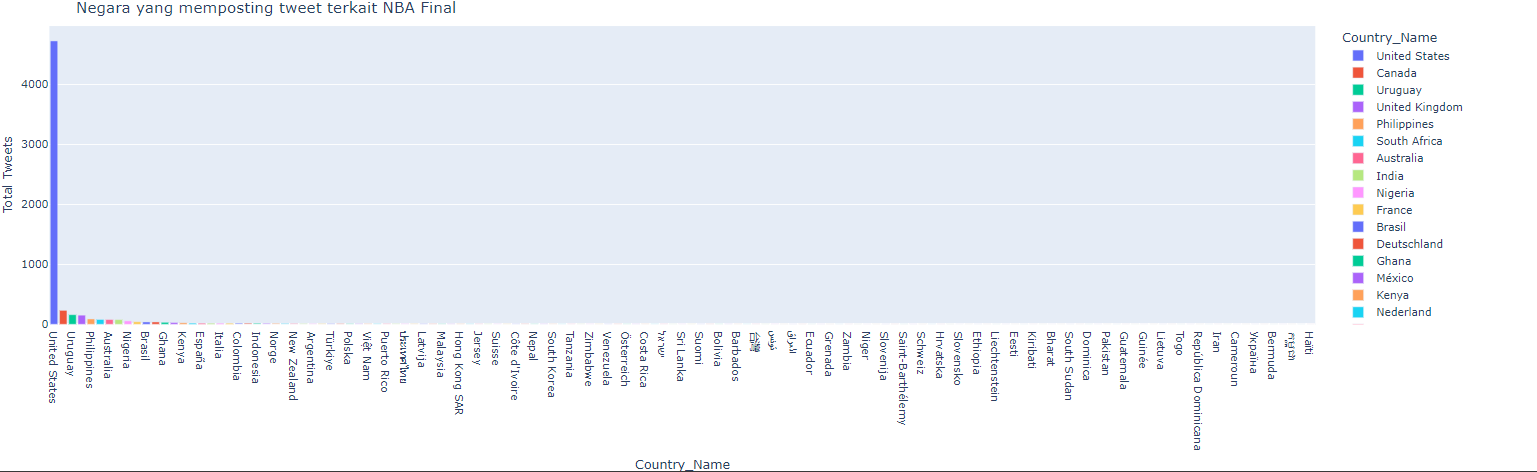

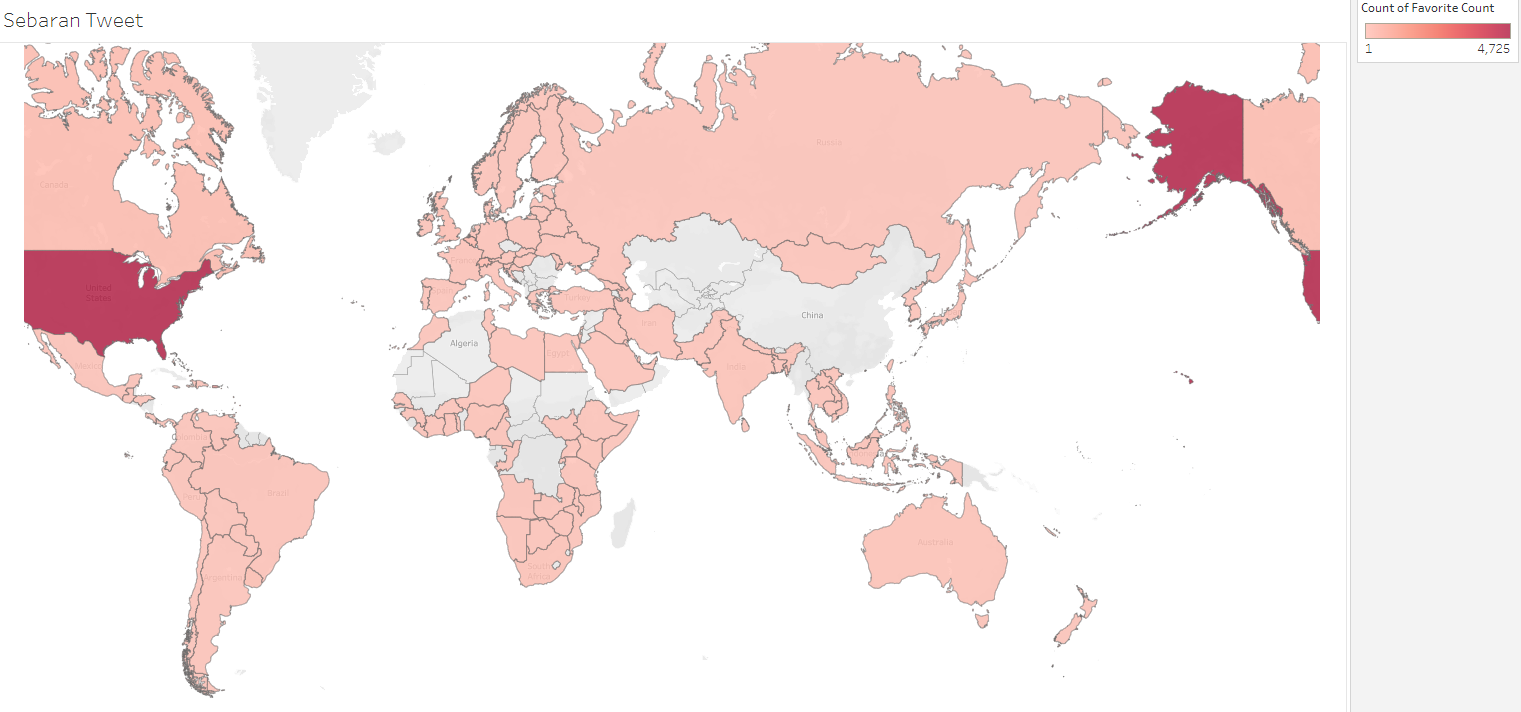

In [39]:
CN_chart.head(10)  # Cek 10 data pertama dari dataframe

,Country_Name,Total Tweets
0,United States,4725
1,Canada,231
2,Uruguay,159
3,United Kingdom,151
4,Philippines,88
5,South Africa,79
6,Australia,78
7,India,77
8,Nigeria,55
9,France,41


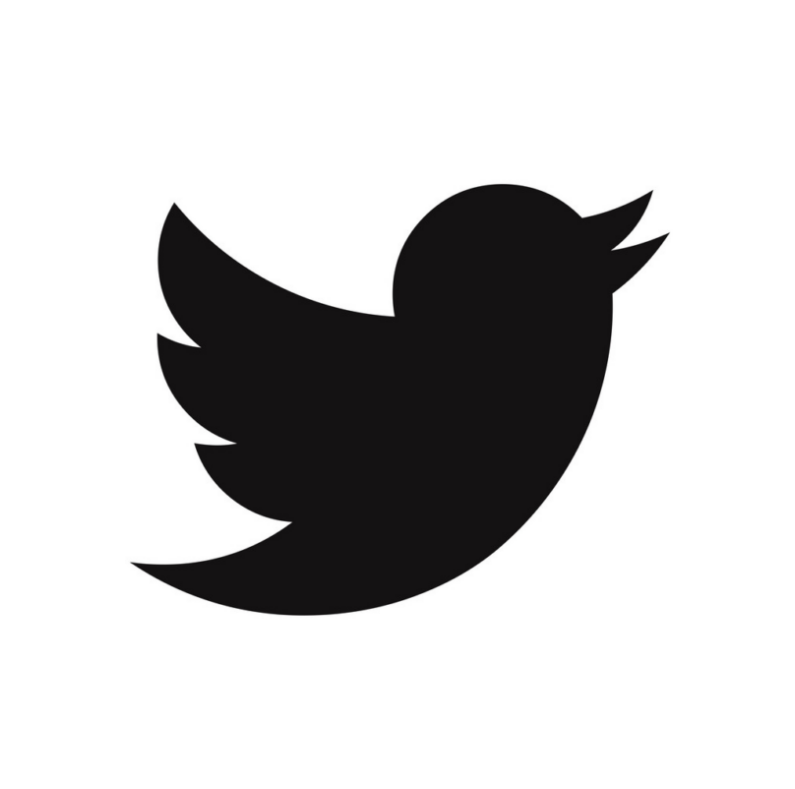

In [43]:
# Import logo Twitter
image = np.array(Image.open('/content/twitter.png')) #Sebelumnya harus upload gambar twitter.png dahulu ke folder /content
    
fig = plt.figure() # Instansiasi objek gambar
fig.set_figwidth(14) # set lebar
fig.set_figheight(18) # set tinggi

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data sebagai gambar
plt.axis('off')
plt.show() # Tampilkan gambar

In [44]:
# Buat fungsi untuk menghasilkan warna biru untuk Word CLoud

def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

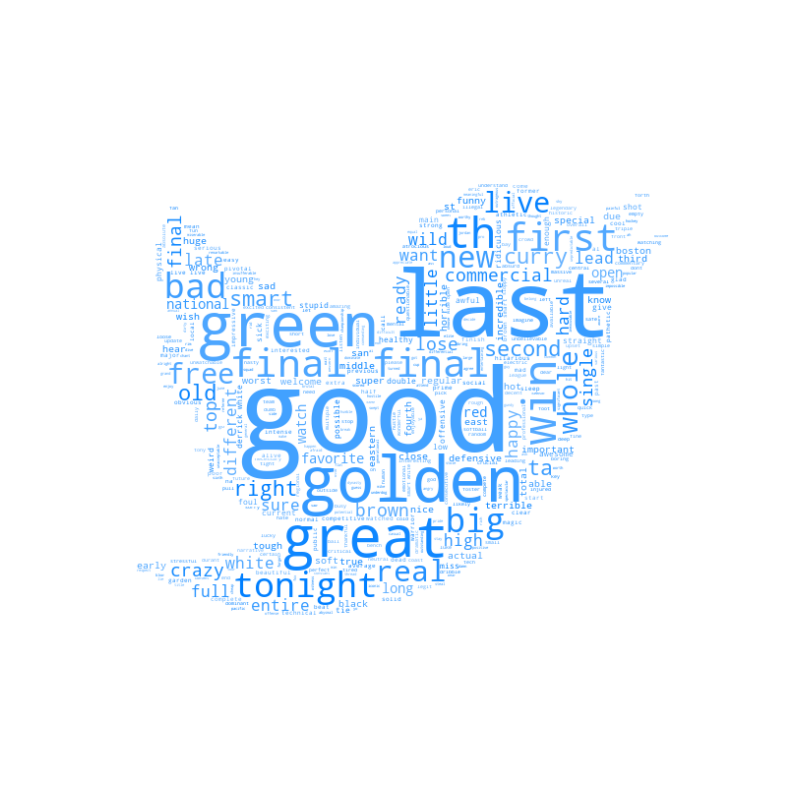

In [45]:
# Buat instance objek cloud kata Twitter
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate word cloud
twitter_wc.generate(tweets_long_string)

#Tampilkan word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set lebar
fig.set_figheight(18)  # set panjang

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [67]:
twitter_wc.to_file("wordcloud.png") #save ke file png

**Menganalisis Kata Teratas di Word Cloud**

In [47]:
# Gabungkan semua kata ke dalam daftar
tweets_long_string = tweets_df['Tweets_Adjectives'].tolist()
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [48]:
# Gunakan modul Koleksi Python Bawaan untuk menentukan frekuensi Word
from collections import Counter
counts = Counter(tweets_list)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ['Words', 'Count']
df.sort_values(by='Count', ascending=False, inplace=True)

In [49]:
df.head(10)

,Words,Count
45,good,378
66,final,339
114,last,333
40,golden,325
3,green,301
29,great,251
101,win,170
251,th,142
25,first,132
108,tonight,124


**10 Kata Teratas di Twitter pada NBA Final**

In [50]:
# Tentukan warna plot menggunakan untuk Plotly
colors = ['rgb(8,48,107)', 'rgb(8,81,156)', 'rgb(33,113,181)', 'rgb(66,146,198)',
            'rgb(107,174,214)', 'rgb(158,202,225)', 'rgb(198,219,239)',
            'rgb(222,235,247)', 'rgb(247,251,255)', 'rgb(247,253,255)']

# Set layout untuk subplot Plotly
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, { "type": "domain"}]],
                    vertical_spacing=0.001)

# Tambahkan plot pertama
fig.add_trace(go.Bar(x = df['Count'].head(10), y=df['Words'].head(10),marker=dict(color='rgba(66,146,198, 1)',
            line=dict(color='Black'),),name='Bar Chart',orientation='h'), 1, 1)

# Tambahkan plot kedua
fig.add_trace(go.Pie(labels=df['Words'].head(10),values=df['Count'].head(15),textinfo='label+percent',
                    insidetextorientation='radial', marker=dict(colors=colors, line=dict(color='DarkSlateGrey')),
                    name='Pie Chart'), 1, 2)
# Costumize plot
fig.update_layout(shapes=[dict(type="line",xref="paper", yref="paper", x0=0.5, y0=0, x1=0.5, y1=1.0,
         line_color='DarkSlateGrey', line_width=1)])

# Judul Plot
fig.update_layout(showlegend=False, title=dict(text="Twitter Users' about NBA Final <i>(10 Most Common Words)</i>",
                  font=dict(size=18, )))

# Pengaturan backgroound, margins, axis, title
fig.update_layout(yaxis=dict(showgrid=False,
                             showline=False,
                             showticklabels=True,
                             domain=[0, 1],
                             categoryorder='total ascending',
                             title=dict(text='Common Words', font_size=14)),
                             xaxis=dict(zeroline=False,
                             showline=False,
                             showticklabels=True,
                             showgrid=True,
                             domain=[0, 0.42],
                             title=dict(text='Word Count', font_size=14)),
                             margin=dict(l=100, r=20, t=70, b=70),
                             paper_bgcolor='rgba(255,255,255,255)',
                             plot_bgcolor='rgba(255,255,255,255)')

x = df['Count'].head(10).to_list()
y = df['Words'].head(10).to_list()

annotations = [dict(xref='x1', yref='y1', x=xa + 350, y=ya, text=str(xa), showarrow=False) for xa, ya in zip(x, y)]

fig.update_layout(annotations=annotations)
fig.show()

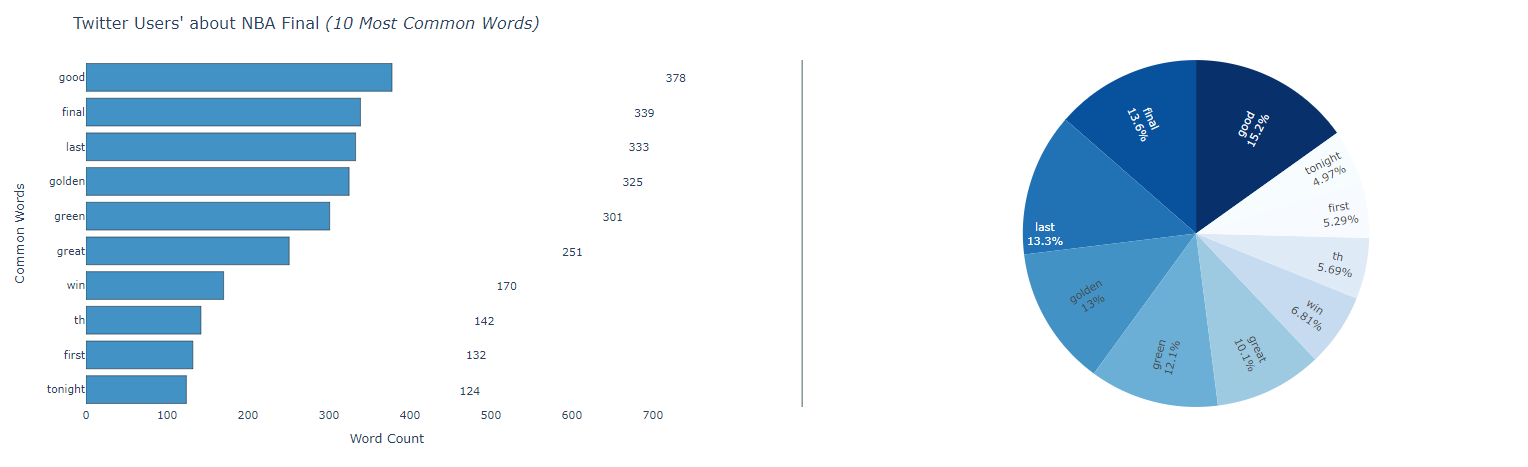

# **7. Sentiment Analysis**
Di bagian ini, tujuannya adalah untuk menunjukkan kata-kata yang paling umum digunakan oleh Pengguna Twitter untuk menggambarkan NBA Final. Hal ini dimungkinkan oleh fungsi getAdjectives. Penulis juga menggunakan WordCloud dan MatPlotlib untuk tugas ini.

In [51]:
# Buat fungsi untuk mendapatkan Skor Subjektivitas
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

# Buat fungsi untuk mendapatkan Skor Polaritas
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Buat fungsi untuk mendapatkan kategori Sentimen
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [52]:
# Terapkan semua fungsi di atas ke masing-masing kolom
tweets_df['Subjectivity']=tweets_df['Tweets_Sentiments'].apply(getSubjectivity)
tweets_df['Polarity']=tweets_df['Tweets_Sentiments'].apply(getPolarity)
tweets_df['Sentiment']=tweets_df['Polarity'].apply(getSentimentTextBlob)

In [53]:
# Lihat hasil cepat dari Analisis Sentimen
tweets_df['Sentiment'].value_counts()

Positive    3712
Negative    3512
Neutral     3358
Name: Sentiment, dtype: int64

In [54]:
# Buat kerangka data untuk Hitungan Kategori Sentimen
bar_chart = tweets_df['Sentiment'].value_counts().rename_axis('Sentiment').to_frame('Total Tweets').reset_index()

In [55]:
bar_chart # Display dataframe

,Sentiment,Total Tweets
0,Positive,3712
1,Negative,3512
2,Neutral,3358


In [56]:
sentiments_barchart = px.bar(bar_chart, x = 'Sentiment', y='Total Tweets', color='Sentiment')

sentiments_barchart.update_layout(title='Distribution of Sentiments Results',
                                  margin={"r": 0, "t": 30, "l": 0, "b": 0})

sentiments_barchart.show() #Display plot. 

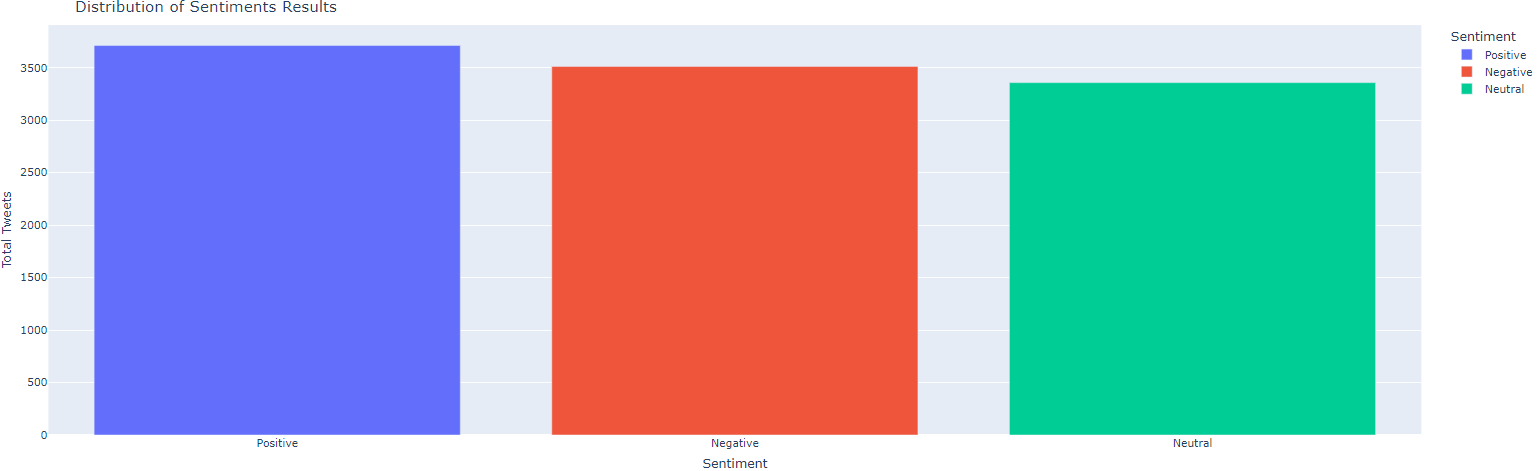

In [57]:
tweets_df.head()

,Tweet_ID,Time_Created,Tweet,Retweet_Count,Favorite_Count,Latitude,Longitude,Country_Code,Country_Name,Processed_Tweets,Tweets_Adjectives,Tweets_Sentiments,Subjectivity,Polarity,Sentiment
0,1533618108216365056,2022-06-06 01:13:44,Draymond having a emotional meltdown...,1,1,40.21789,-74.75941,USA,United States,emotional game definitely winning se...,emotional,emotional game definitely winning se...,0.600000,0.033333,Positive
1,1533618143767175168,2022-06-06 01:13:53,"The NBA finals are so boring, I can'...",0,0,42.62810,-89.09022,USA,United States,boring ca even watch team hard pass,hard,boring ca even watch team hard pas,0.770833,-0.645833,Negative
2,1533618149341507584,2022-06-06 01:13:54,My son has me watching the #NBA fina...,0,3,40.81483,-73.25684,USA,United States,son watching review everything,,son watching review everything,0.000000,0.000000,Neutral
3,1533618150381654018,2022-06-06 01:13:54,You can’t eject someone from an NBA ...,0,0,42.24810,-71.17320,USA,United States,eject someone game something weak like,weak,eject someone game something weak like,0.512500,-0.387500,Negative
4,1533618153925779457,2022-06-06 01:13:55,Draymond Green doing dumb ass shit i...,0,2,NaN,NaN,NaN,NaN,green dumb ass tell something new,green dumb new,green dumb as tell something new,0.418182,-0.146212,Negative


In [58]:
posSent = tweets_df['Tweet'][tweets_df['Sentiment'] == 'Positive']
posSent.head(10)

0     Draymond having a emotional meltdown...
5     Even dining an NBA FINALS GAME 2\n\n...
6     Non-Mets Related: Who do you have wi...
8     They throw Draymond out for this, yo...
17    No technicals this is the NBA finals...
27    Nemanja Bjelica getting meaningful m...
28    I watched Draymond Green become the ...
29    One day I'll be able to cheer for th...
30    Van Gundy nails it. That’s great off...
31    So.... when you get your first T in ...
Name: Tweet, dtype: object

In [59]:
neuSent = tweets_df['Tweet'][tweets_df['Sentiment'] == 'Neutral']
neuSent.head(10)

2     My son has me watching the #NBA fina...
7     the level of defensive intensity and...
10    It’s not the NBA Finals if Draymond ...
11                                 Nba finals
16    That why the NBA Finals has the low ...
18    Draymond can’t control his feet in t...
21    Does Draymond know that he’s in the ...
23    Can the NBA finals get some differen...
25    Does anyone else have to mute the NB...
32    Klay playing at 0.5x speed and that’...
Name: Tweet, dtype: object

In [60]:
negSent = tweets_df['Tweet'][tweets_df['Sentiment'] == 'Negative']
negSent.head(10)

1     The NBA finals are so boring, I can'...
3     You can’t eject someone from an NBA ...
4     Draymond Green doing dumb ass shit i...
9     It is the NBA FINALS!!!! Enough of t...
12    *seinfeld voice* Green? White? Brown...
13    These NBA Finals are so boring to wa...
14    It’s the NBA Finals and Draymond Gre...
15    That's a technical, except Draymond ...
19    Dear gosh everything is a review. It...
20    Can NOT be an ejection call in an NB...
Name: Tweet, dtype: object

In [61]:
# Hapus kolom yang tidak perlu
tableau_df = tweets_df.drop((['Processed_Tweets','Tweets_Sentiments','Subjectivity','Polarity']), axis=1).copy(deep=True)

In [62]:
tableau_df.head()

,Tweet_ID,Time_Created,Tweet,Retweet_Count,Favorite_Count,Latitude,Longitude,Country_Code,Country_Name,Tweets_Adjectives,Sentiment
0,1533618108216365056,2022-06-06 01:13:44,Draymond having a emotional meltdown...,1,1,40.21789,-74.75941,USA,United States,emotional,Positive
1,1533618143767175168,2022-06-06 01:13:53,"The NBA finals are so boring, I can'...",0,0,42.62810,-89.09022,USA,United States,hard,Negative
2,1533618149341507584,2022-06-06 01:13:54,My son has me watching the #NBA fina...,0,3,40.81483,-73.25684,USA,United States,,Neutral
3,1533618150381654018,2022-06-06 01:13:54,You can’t eject someone from an NBA ...,0,0,42.24810,-71.17320,USA,United States,weak,Negative
4,1533618153925779457,2022-06-06 01:13:55,Draymond Green doing dumb ass shit i...,0,2,NaN,NaN,NaN,NaN,green dumb new,Negative


In [65]:
# Ekspor ke file Excel.
tableau_df.to_excel('Tweets_Tableau_Final_File.xlsx', encoding='utf-8-sig', index=False)